# **Employee Attrition preditiction: Machine learning model**

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/Dataset01-Employee_Attrition.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.shape
data.columns
data.dtypes
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(11991, 10)

In [ ]:
data1=data.drop_duplicates()
data1.shape

(11991, 10)

# Check for missing ***value***

In [ ]:
data.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


**Data exploration and visualization** *italicized text*

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


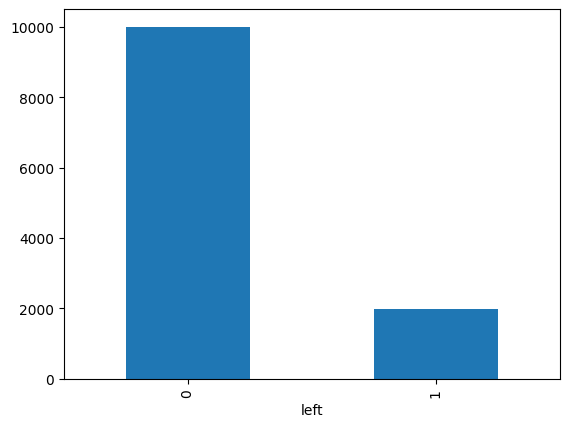

In [ ]:
data1['left'].value_counts()
data1["left"].value_counts().plot(kind="bar")
data1.head()

In [ ]:
print(data1.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


<Axes: xlabel='salary'>

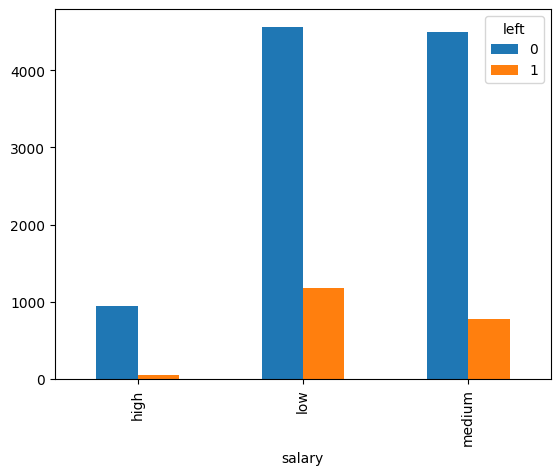

In [ ]:
pd.crosstab(data1.salary,data1.left).plot(kind="bar")

<Axes: xlabel='Department'>

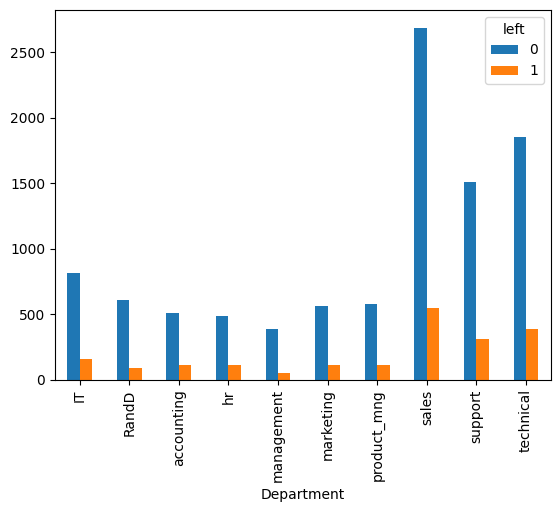

In [ ]:
pd.crosstab(data1.Department,data1.left).plot(kind="bar")

In [ ]:
pd.crosstab(data1.Department,data1.left)

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


In [ ]:
pd.crosstab(data1.salary,data1.left)

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


In [ ]:
num_feature_list1=[f for f in data1.columns if data1.dtypes[f]=='float64']
num_feature_list1

['satisfaction_level', 'last_evaluation']

In [ ]:
num_feature_list2=[f for f in data1.columns if data1.dtypes[f]=='int64']
num_feature_list2

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

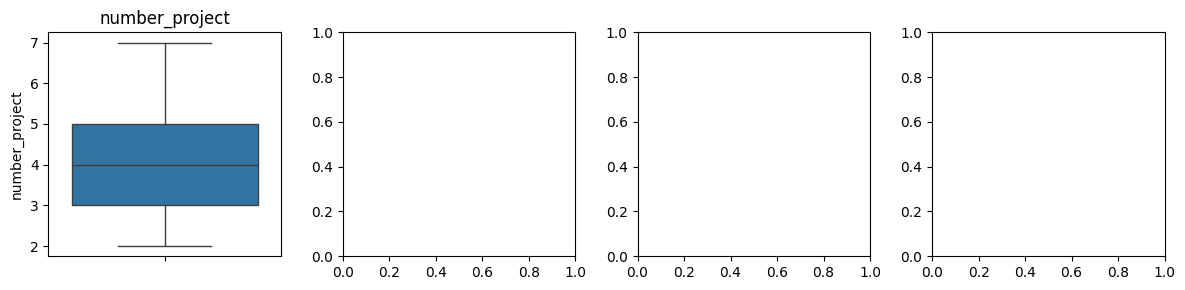

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
fig,axes=plt.subplots(ncols= 4,figsize=(12,3))
for column,axis in zip (num_feature_list1[:4],axes):
  sns.boxplot(data=data1[column],ax=axis)
  axis.set_title(column)
  plt.tight_layout()
  plt.show()


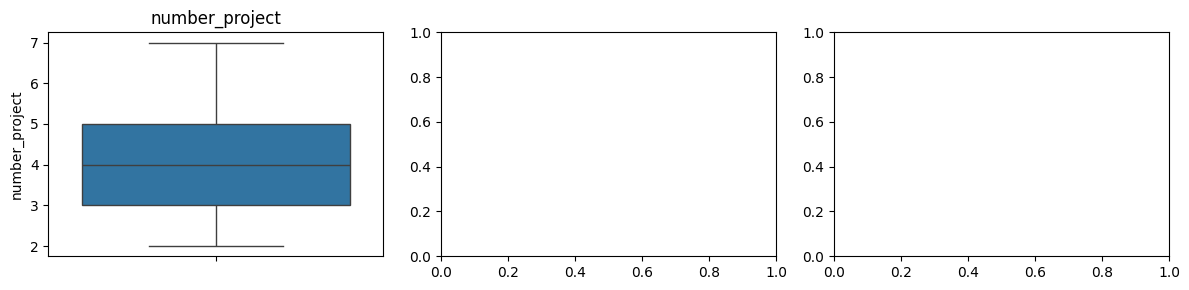

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
fig,axes=plt.subplots(ncols= 3,figsize=(12,3))
for column,axis in zip (num_feature_list1[:4],axes):
  sns.boxplot(data=data1[column],ax=axis)
  axis.set_title(column)
  plt.tight_layout()
  plt.show()

<Axes: ylabel='Frequency'>

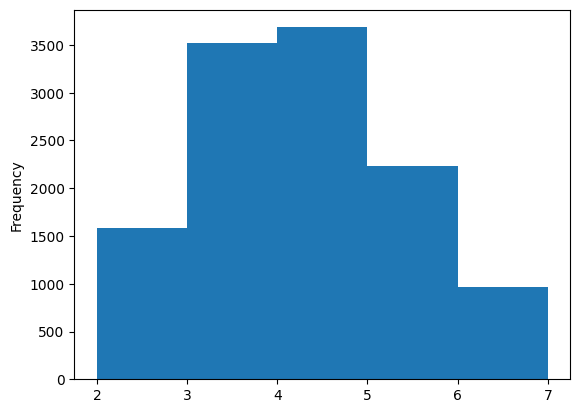

In [ ]:
data1['number_project'].plot(kind='hist',bins=5)

<Axes: ylabel='Frequency'>

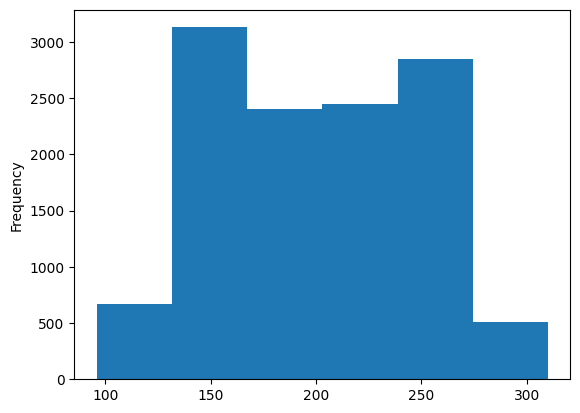

In [ ]:
data1['average_montly_hours'].plot(kind='hist',bins=6)

<Axes: ylabel='Frequency'>

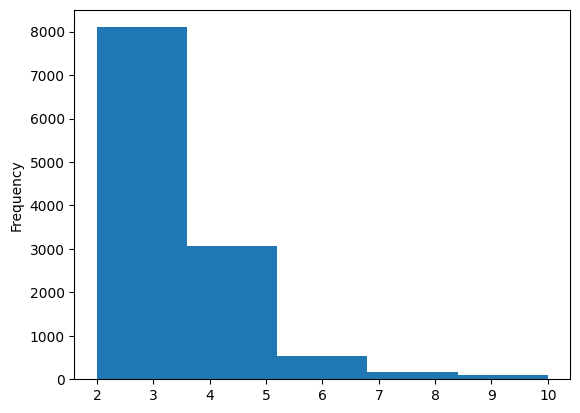

In [ ]:
data1['time_spend_company'].plot(kind='hist',bins=5)

<Axes: ylabel='Frequency'>

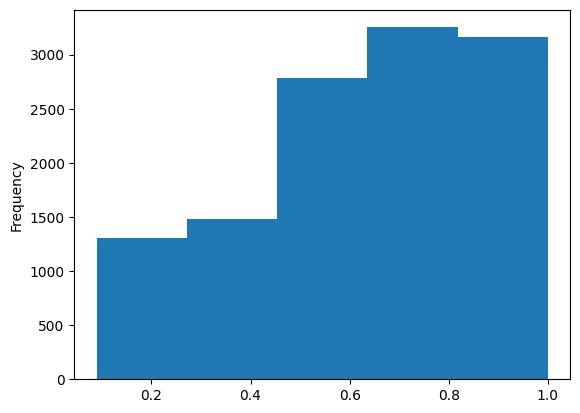

In [ ]:
data1['satisfaction_level'].plot(kind='hist',bins=5)

<Axes: ylabel='Frequency'>

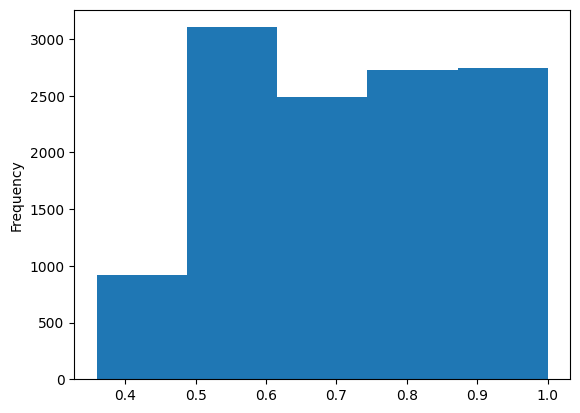

In [ ]:
data1['last_evaluation'].plot(kind='hist',bins=5)

**Feature Engineering**

# Labell Encoding:Converting categorical features into Numerical


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
Label_encoder=LabelEncoder()

In [ ]:
data=pd.read_csv("/content/Dataset01-Employee_Attrition.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
from google.colab import drive
drive.mount('kizie')

Mounted at kizie


In [ ]:
Label_encoder=LabelEncoder()
data['salary']=Label_encoder.fit_transform(data['salary'])
data['DeprecationWarning']=Label_encoder.fit_transform(data['Department'])


In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,DeprecationWarning
0,0.38,0.53,2,157,3,0,1,0,sales,1,7
1,0.80,0.86,5,262,6,0,1,0,sales,2,7
2,0.11,0.88,7,272,4,0,1,0,sales,2,7
3,0.72,0.87,5,223,5,0,1,0,sales,1,7
4,0.37,0.52,2,159,3,0,1,0,sales,1,7


In [ ]:
x=data.drop('left',axis=1)
y=data['left']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(11999, 10)

In [ ]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,DeprecationWarning
9838,1.00,0.61,3,188,4,0,0,product_mng,1,6
7689,0.16,0.78,4,196,5,0,0,technical,0,9
6557,0.80,0.80,3,175,2,0,0,RandD,2,1
6872,0.66,0.86,4,112,6,0,0,accounting,2,2
820,0.11,0.93,7,284,4,0,0,technical,1,9


In [ ]:
 import pandas as pd
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import train_test_split
 std_scaaler=StandardScaler

In [ ]:
import pandas as pd

# For One-Hot Encoding
x_train_encoded = pd.get_dummies(x_train, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, drop_first=True)

# Align columns in x_test with x_train
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)


NameError: name 'x_train' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
xtrain_scaled = std_scaler.fit_transform(x_train_encoded)
xtest_scaled = std_scaler.transform(x_test_encoded)



In [ ]:
xtrain_scaled
xtest_scaled

array([[ 0.14964719,  1.42167607,  0.96731926, ..., -0.61810584,
        -0.41542618, -0.47026373],
       [ 1.0734216 ,  0.48863721, -0.65341156, ..., -0.61810584,
        -0.41542618, -0.47026373],
       [ 0.31030361,  1.53830593, -0.65341156, ...,  1.61784591,
        -0.41542618, -0.47026373],
       ...,
       [ 0.67178055, -0.61934644, -0.65341156, ...,  1.61784591,
        -0.41542618, -0.47026373],
       [ 1.1135857 ,  0.2553775 , -1.46377697, ...,  1.61784591,
        -0.41542618, -0.47026373],
       [-1.21593237,  0.72189693,  2.58805008, ..., -0.61810584,
        -0.41542618,  2.12646636]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Random_forest_model=RandomForestClassifier()

In [ ]:
Random_forest_model.fit(xtrain_scaled,y_train)

RandomForestClassifier()

Model Training:

In [ ]:
Random_forest_model.fit(xtrain_scaled,y_train)

RandomForestClassifier()

Model Prediction:

In [ ]:
y_pred=Random_forest_model.predict(xtest_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

**Model Evaluation:*

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2285    9]
 [  25  681]]


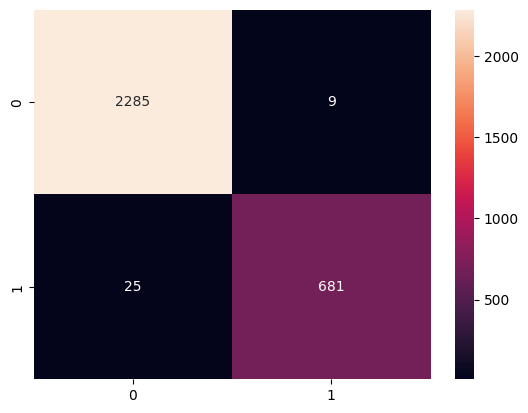

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cm' is your confusion matrix
sns.heatmap(cm, annot=True, fmt="d")

plt.show()  # This line will display the heatmap


In [ ]:
from sklearn.metrics import top_k_accuracy_score
model= accuracy =  top_k_accuracy_score(y_test,y_pred)
print("Accuracy of the model=", top_k_accuracy_score)

Accuracy of the model= <function top_k_accuracy_score at 0x7f2eb20c7010>


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:2025: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(


In [ ]:
from sklearn.metrics import precision_score
model= precision =  precision_score(y_test,y_pred)
print("precision of the model=", precision_score)

precision of the model= <function precision_score at 0x7f2eb206be20>


In [ ]:
from sklearn.metrics import recall_score
model= recall =  recall_score(y_test,y_pred)
print("recall of the model=", recall_score)

recall of the model= <function recall_score at 0x7f2eb206bf40>


In [ ]:
from sklearn.metrics import f1_score
model= recall =  f1_score(y_test,y_pred)
print("f1 of the model=", f1_score)

f1 of the model= <function f1_score at 0x7f2eb206b7f0>


CLASSIFICATION Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



feature Importance Metrix in Random Forest/feature Extraction:

In [ ]:
import pandas as pd

score_list = Random_forest_model.feature_importances_
list_of_features = list(X.columns)

# Check if the lengths of the two lists are equal
# If not, print the lengths and investigate the cause of the mismatch
if len(score_list) != len(list_of_features):
    print(f"Length of score_list: {len(score_list)}")
    print(f"Length of list_of_features: {len(list_of_features)}")
    # You might need to debug your feature selection process or model training
    # to ensure the number of features is consistent
else:
    score_df = pd.DataFrame({"feature": list_of_features, "Score": score_list})
    # 'ascending' is the correct spelling.
    # 'score' column should be 'Score' to match the column name in the DataFrame.
    score_df = score_df.sort_values(by='Score', ascending=False)
    print(score_df)

Length of score_list: 18
Length of list_of_features: 10


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (18,) and arg 3 with shape (10,).

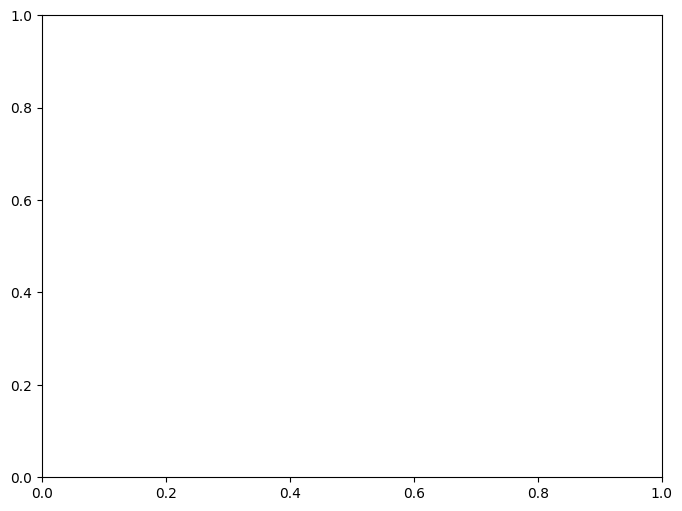

In [ ]:
import pandas as ps
import numpy as np
list_of_features=list(X.columns)
plt.figure(figsize=(8,6))
plt.barh(range(len(list_of_features)),Random_forest_model.feature_importances_)
plt.yticks(np.range(len(list_of_features)),list_of_features)
plt.ylabel('features')
plt.xlabel('feature importance')
plt.title('features importance')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

list_of_features = list(X.columns)
importances = Random_forest_model.feature_importances_

# Check the length of the importances and features
if len(list_of_features) != len(importances):
    print("Warning: Mismatch between features and importances.")
else:
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(list_of_features)), importances)
    plt.yticks(np.arange(len(list_of_features)), list_of_features)
    plt.ylabel('Features')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance')
    plt.show()


In [ ]:
import numpy aas np
import matplotlib.pyplot as plt
